<a href="https://colab.research.google.com/github/nuzulgusti/Decision_Tree_Task/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('telecom_churn.csv',sep=";")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [2]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [3]:
#memisakhan atribut dengan label dimana x itu atribut dan y itu label
X = data[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls',
          'DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']]
y = data['Churn']


#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=123)

In [4]:
from sklearn.tree import DecisionTreeClassifier

#menentukan  model decision tree
model = DecisionTreeClassifier(max_depth=4)

#melatih model menggunakan data latih dengan fungsi fit
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [7]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

akurasi = (classification_report(y_test, y_pred))
print(akurasi)
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi: %d persen" %(akurasi*100))

#accuracy_score =round(accuracy_score(y_pred, y_test), 3)
#print('Accuracy: ',accuracy_score)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       294
           1       0.86      0.45      0.59        40

    accuracy                           0.93       334
   macro avg       0.89      0.72      0.77       334
weighted avg       0.92      0.93      0.91       334

Tingkat Akurasi: 92 persen


In [8]:
#melihat visulisasi datanya decision tree
from sklearn.tree import export_graphviz

export_graphviz(model,
                out_file="churn_tree.dot",
                feature_names=['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls',
                               'DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'],
                class_names=['0','1'],
                rounded=True,
                filled=True)

In [10]:
import graphviz

# Open the DOT file containing your graph description
with open("churn_tree.dot", "r") as fig:
    dot_graph = fig.read()

# Create a Graphviz object from the DOT source
graph = graphviz.Source(dot_graph)

# Render the graph as a PNG image and specify the output filename
graph.render(filename="Tree_Churn", format="png")  # Replace with your desired filename

# Display the generated PNG image (optional)
# graph.render()  # This will open the image in your default image viewer

'Tree_Churn.png'

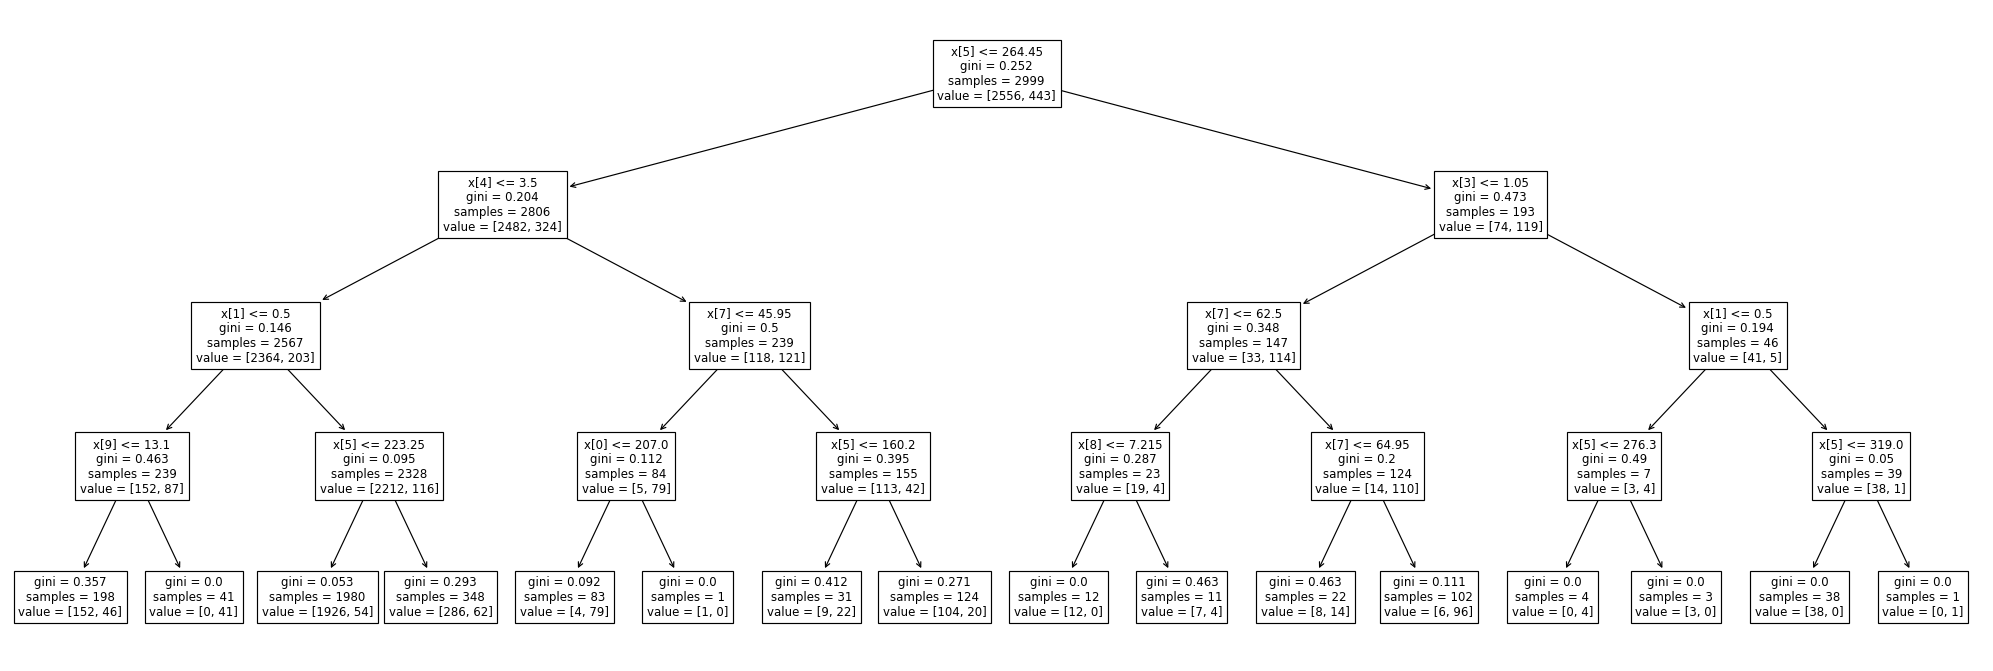

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(30, 10))
tree.plot_tree(model, fontsize=10)
plt.show()